In [34]:
#mini project 3 - Nolan Pellicane - Lego market analysis and predictive modeling 

In [1]:
#pupose
#i want to complete two tasks with this data set and potentially introducing another 
# the first thing I want to do is conduct market analysis of the pricing changes based on theme,year etc
#next i want to create a predictive model on the price based on pieces ,minifigs, rating, and USD_MSRP 

In [1]:
#huge import list 
import pandas as pd
import itertools
import numpy as np
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold 
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import os
import zipfile
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
import zipfile
import os

def unzip_and_extract_sets_csv(zip_file_path, extract_to_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all contents to a temporary folder
        zip_ref.extractall(extract_to_path)

        # Check if there's a folder named "LEGO Data"
        extracted_items = zip_ref.namelist()
        if 'LEGO Data/' in extracted_items:
            # Check if there's a file named "sets.csv" inside the "LEGO Data" folder
            lego_data_folder_path = os.path.join(extract_to_path, 'LEGO Data')
            if 'sets.csv' in zip_ref.namelist():
                # Extract "sets.csv" from the zip file
                zip_ref.extract('LEGO Data/sets.csv', extract_to_path)

# Specify the path to the zip file and the extraction folder
zip_file_path = os.path.expanduser('~/Downloads/archive (5).zip')
extract_to_path = '~/Downloads/LEGO Sets'

# Call the function to unzip the file and extract sets.csv
unzip_and_extract_sets_csv(zip_file_path, extract_to_path)

In [3]:
csv_file_path = '~/Downloads/LEGO Sets/sets.csv'  # Replace this with the actual path to your sets.csv file

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(df.head())

  Set_ID            Name  Year      Theme Theme_Group   Subtheme Category  \
0   75-1   PreSchool Set  1975  PreSchool  Pre-school        NaN   Normal   
1   77-1   PreSchool Set  1975  PreSchool  Pre-school        NaN   Normal   
2  077-1  Pre-School Set  1975      Duplo  Pre-school        NaN   Normal   
3   78-1   PreSchool Set  1975  PreSchool  Pre-school        NaN   Normal   
4   78-3       Basic Set  1975  Samsonite     Vintage  Basic set   Normal   

         Packaging  Num_Instructions     Availability  Pieces  Minifigures  \
0  {Not specified}                 0  {Not specified}    16.0          NaN   
1  {Not specified}                 0  {Not specified}    20.0          NaN   
2  {Not specified}                 0  {Not specified}    21.0          NaN   
3  {Not specified}                 0  {Not specified}    32.0          NaN   
4              Box                 0  {Not specified}   330.0          NaN   

   Owned  Rating  USD_MSRP  Total_Quantity  Current_Price  
0   10.0

In [4]:
df.info

<bound method DataFrame.info of          Set_ID                     Name  Year      Theme    Theme_Group  \
0          75-1            PreSchool Set  1975  PreSchool     Pre-school   
1          77-1            PreSchool Set  1975  PreSchool     Pre-school   
2         077-1           Pre-School Set  1975      Duplo     Pre-school   
3          78-1            PreSchool Set  1975  PreSchool     Pre-school   
4          78-3                Basic Set  1975  Samsonite        Vintage   
...         ...                      ...   ...        ...            ...   
14931  854242-1        Creeper Key Chain  2023       Gear  Miscellaneous   
14932  854243-1          Steve Key Chain  2023       Gear  Miscellaneous   
14933  854244-1         Piglin Key Chain  2023       Gear  Miscellaneous   
14934  854245-1   Fennec Shand Key Chain  2023       Gear  Miscellaneous   
14935  854246-1  Scout Trooper Key Chain  2023       Gear  Miscellaneous   

                   Subtheme Category        Packaging  

In [40]:
df.columns

Index(['Set_ID', 'Name', 'Year', 'Theme', 'Theme_Group', 'Subtheme',
       'Category', 'Packaging', 'Num_Instructions', 'Availability', 'Pieces',
       'Minifigures', 'Owned', 'Rating', 'USD_MSRP', 'Total_Quantity',
       'Current_Price'],
      dtype='object')

In [6]:
df.shape

(14936, 17)

In [6]:
df.isnull().sum()

Set_ID              0
Name                0
Year                0
Theme               0
Theme_Group         0
Subtheme            0
Category            0
Packaging           0
Num_Instructions    0
Availability        0
Pieces              0
Minifigures         0
Owned               0
Rating              0
USD_MSRP            0
Total_Quantity      0
Current_Price       0
dtype: int64

C:\Users\Nolan\AppData\Local\Temp\ipykernel_8336\287394362.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


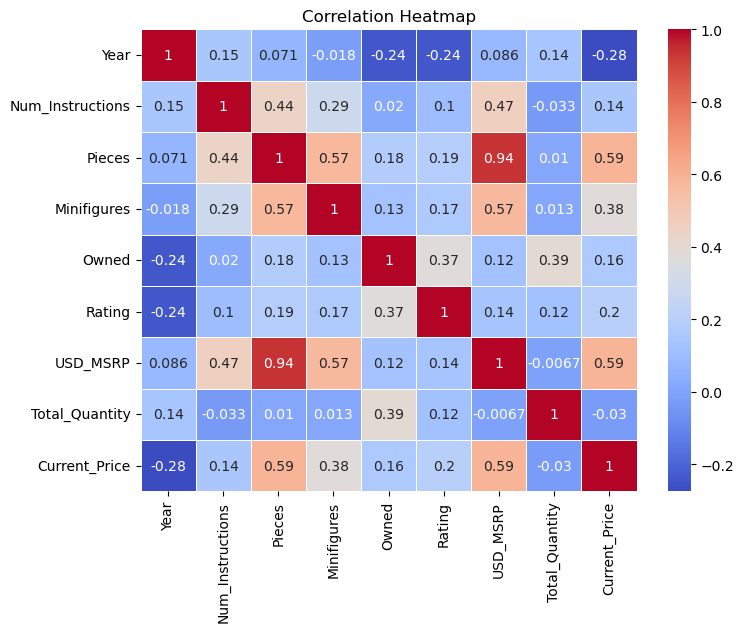

In [7]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
df.head()

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,75-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},16.0,NaN,10.0,0.0,NaN,NaN,NaN
1,77-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},20.0,NaN,11.0,0.0,NaN,NaN,NaN
2,077-1,Pre-School Set,1975,Duplo,Pre-school,NaN,Normal,{Not specified},0,{Not specified},21.0,NaN,10.0,0.0,NaN,0.0,NaN
3,78-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},32.0,NaN,8.0,0.0,NaN,NaN,NaN
4,78-3,Basic Set,1975,Samsonite,Vintage,Basic set,Normal,Box,0,{Not specified},330.0,NaN,10.0,0.0,NaN,0.0,NaN


In [10]:
df['Rating'].isnull().sum()

0

In [11]:
df['Current_Price'].isnull().sum()

9494

In [5]:
df.dropna(inplace=True)

In [6]:
df['Rating'].value_counts()

3.9    244
3.8    244
4.0    233
4.1    225
0.0    215
3.7    192
4.2    163
3.6    154
3.5    108
4.3    107
4.4     90
3.4     75
4.5     53
3.3     40
4.6     29
3.2     16
4.7     11
3.1     11
3.0      4
4.8      4
2.9      3
2.3      1
Name: Rating, dtype: int64

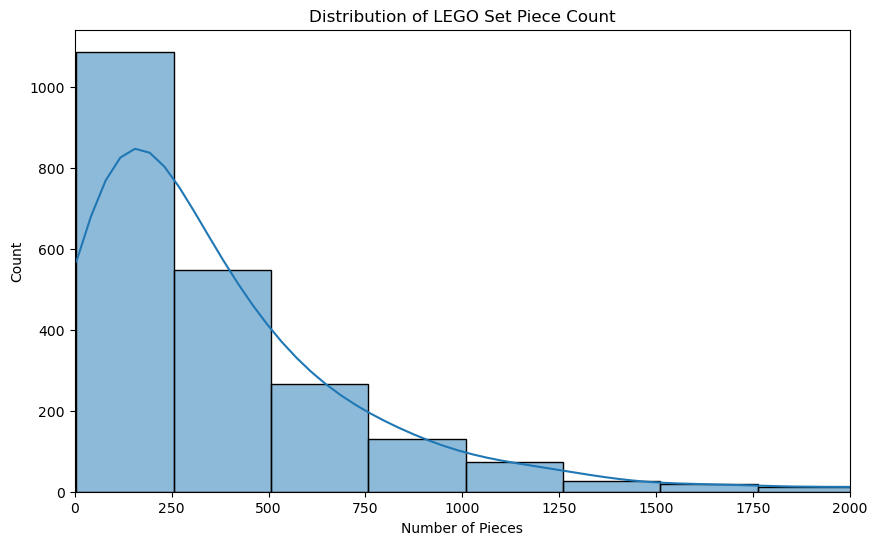

In [9]:
#Histogram of piece count
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Pieces', bins=30, kde=True)
plt.title('Distribution of LEGO Set Piece Count')
plt.xlabel('Number of Pieces')
plt.ylabel('Count')
plt.xlim(0, 2000) 
plt.show()

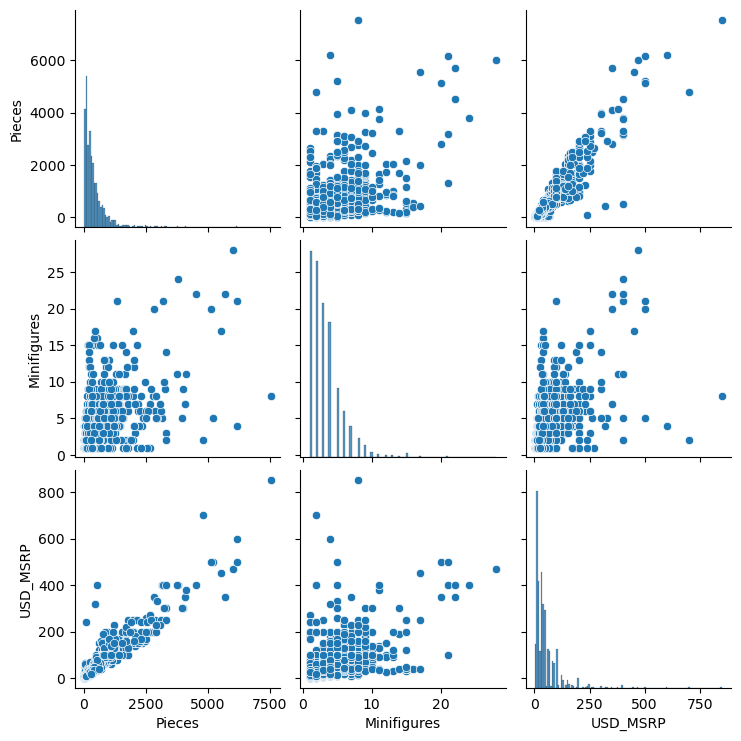

In [10]:
sns.pairplot(df[['Pieces', 'Minifigures', 'USD_MSRP']])
plt.show()

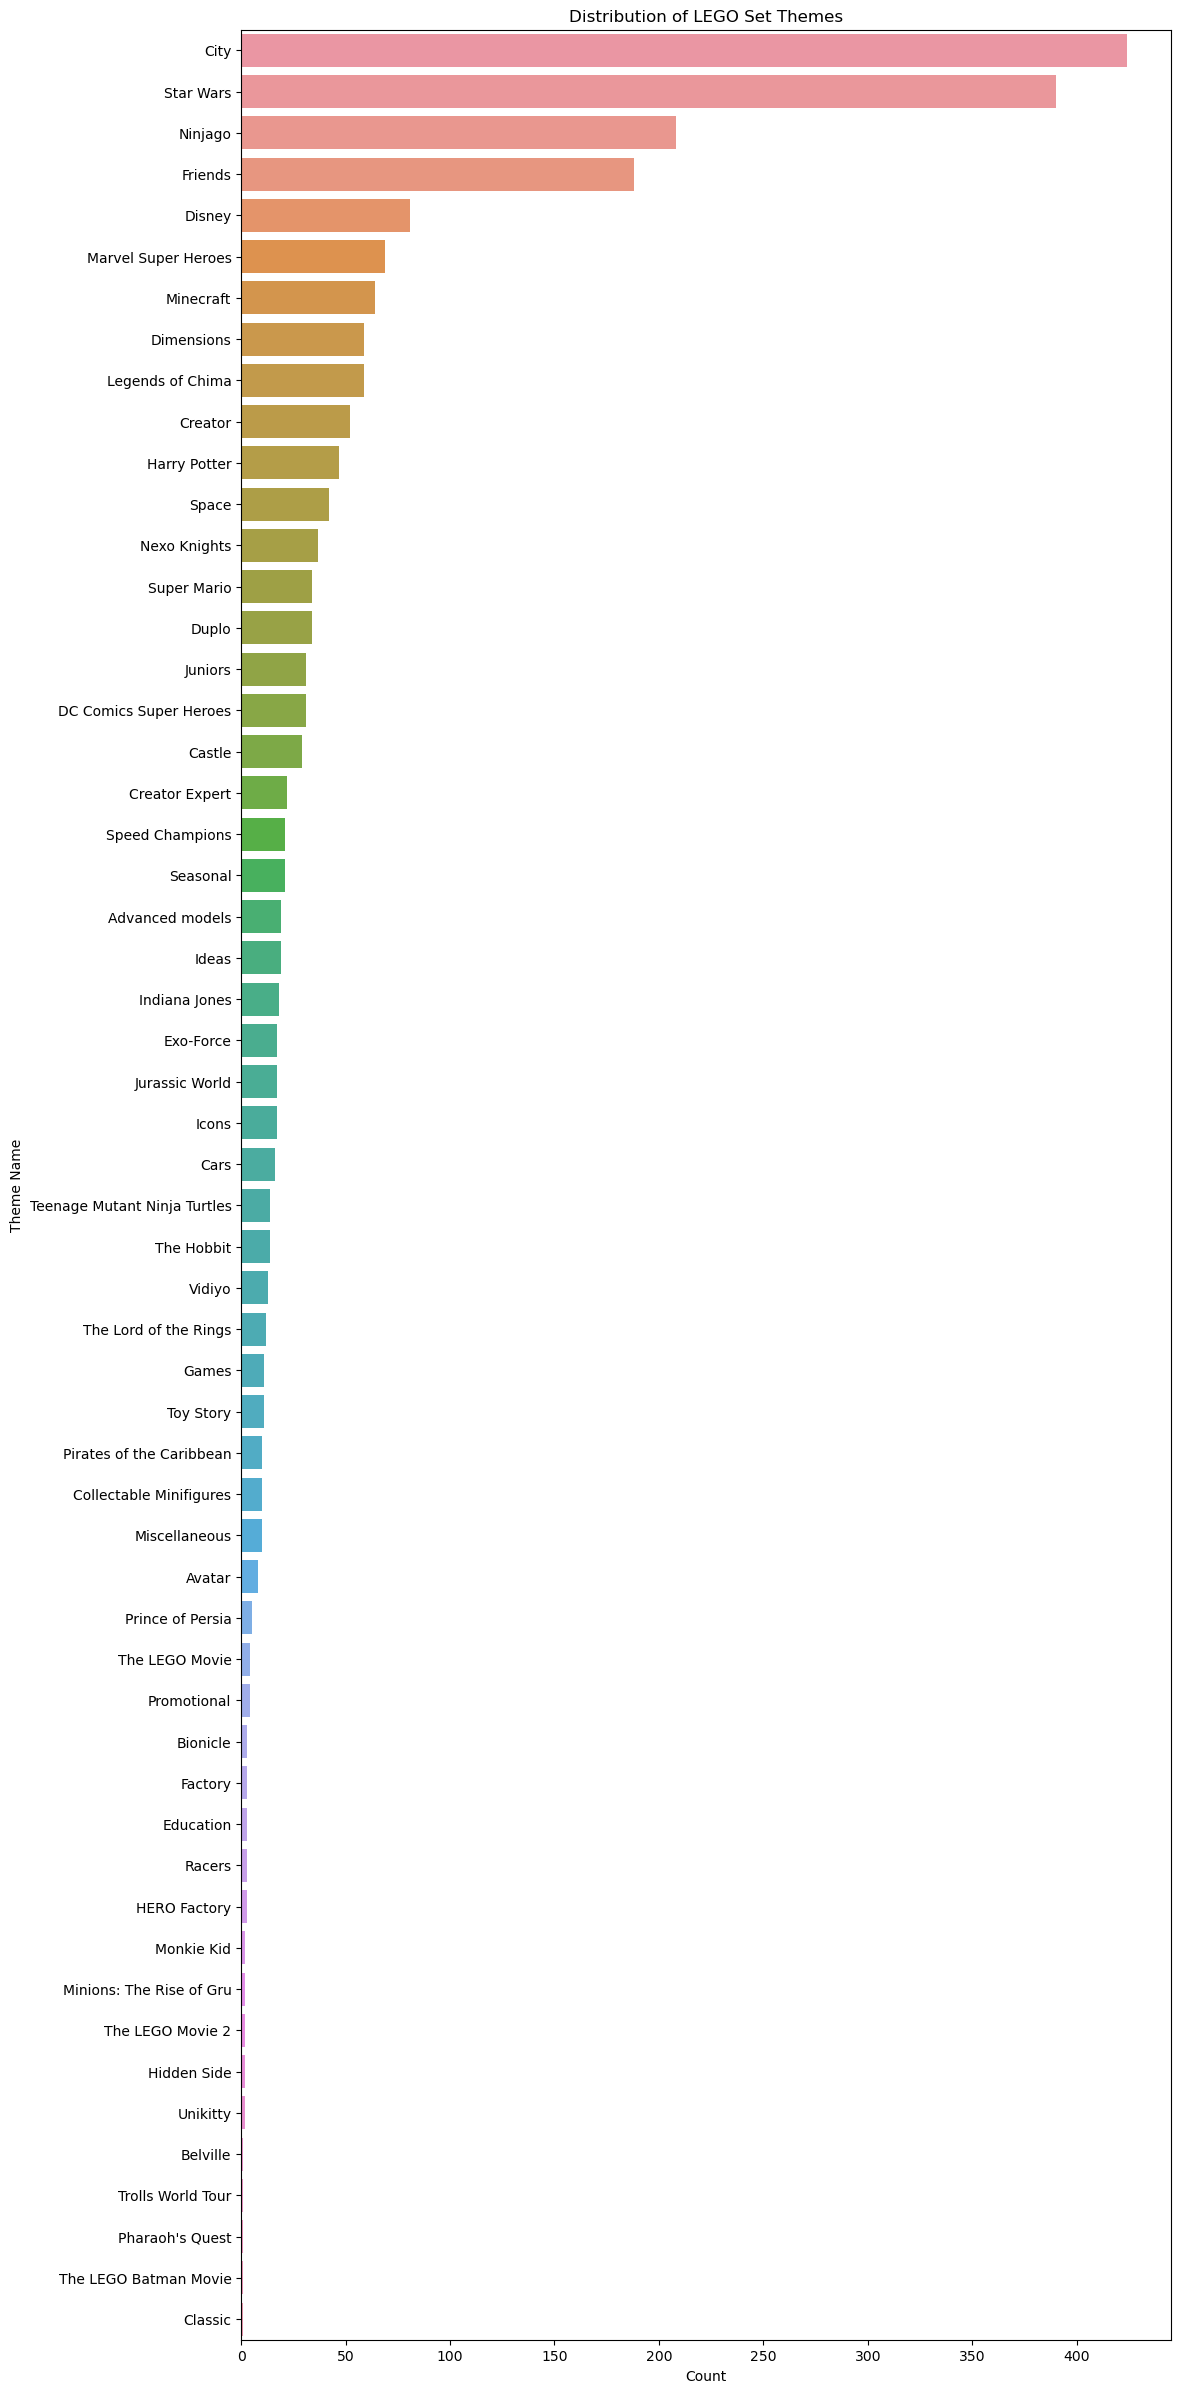

In [11]:
plt.figure(figsize=(12, 30))

sns.countplot(data=df, y='Theme', order=df['Theme'].value_counts().index)
plt.title('Distribution of LEGO Set Themes')
plt.xlabel('Count')
plt.ylabel('Theme Name')
plt.show()

In [7]:
# Remove rows with a rating of 0 so only sets with ratings are used for prediction 
df = df[df['Rating'] != 0]

In [8]:
#average rating for different themes
avg_rating_by_theme = df.groupby('Theme')['Rating'].mean().sort_values(ascending=False)

#print
print(avg_rating_by_theme)

Theme
Icons                           4.418750
Advanced models                 4.405263
Avatar                          4.350000
Ideas                           4.316667
Indiana Jones                   4.283333
The Lord of the Rings           4.241667
Creator Expert                  4.222727
Pirates of the Caribbean        4.130000
Castle                          4.125000
Speed Champions                 4.104762
Exo-Force                       4.076471
Duplo                           4.062500
Space                           4.052381
Harry Potter                    4.046809
Creator                         4.044231
Toy Story                       4.018182
The Hobbit                      4.007143
Minions: The Rise of Gru        4.000000
HERO Factory                    4.000000
Star Wars                       3.975385
Promotional                     3.975000
Collectable Minifigures         3.970000
Prince of Persia                3.960000
Ninjago                         3.947761
Minecraft 

In [9]:
df['avg_rating_by_theme'] = avg_rating_by_theme 


C:\Users\Nolan\AppData\Local\Temp\ipykernel_4016\1563012782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_rating_by_theme'] = avg_rating_by_theme


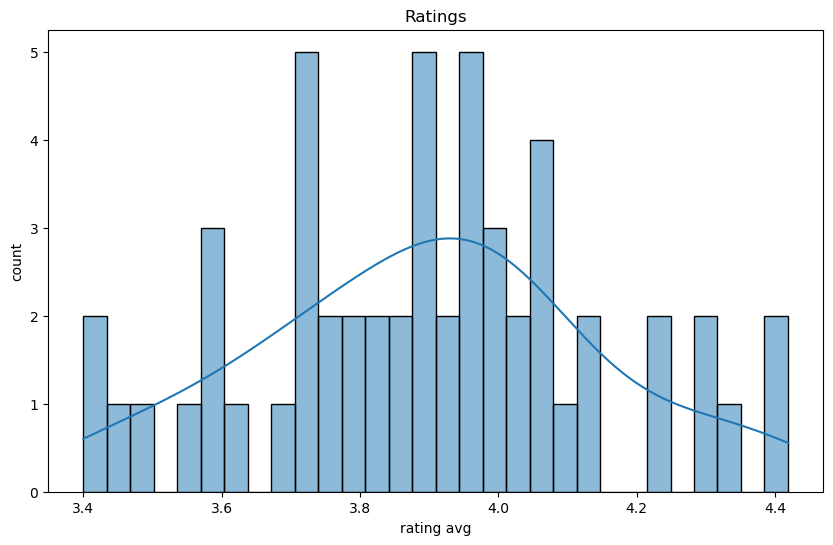

In [10]:
#Histogram of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=avg_rating_by_theme , bins=30, kde=True)
plt.title('Ratings')
plt.xlabel('rating avg')
plt.ylabel('count')
plt.show()

In [16]:
#EDA
#outliers
Q1 = transfusion.quantile(0.25)
Q3 = transfusion.quantile(0.75)
IQR = Q3 - Q1
outliers = ((transfusion < (Q1 - 1.5 * IQR)) | (transfusion > (Q3 + 1.5 * IQR))).any(axis=1)
print("Rows with outliers:")
print(transfusion[outliers])

NameError: name 'transfusion' is not defined

In [ ]:
#EDA

In [ ]:
#EDA

In [11]:
#data split and training 
#find target and predictor variables 
X = df[['Pieces','Minifigures','Rating','USD_MSRP']]
y = df['Current_Price']

#train/split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#model creation and fitting
model1 = LinearRegression()
model1.fit(X,y)

LinearRegression()

In [13]:
model1.score(X,y)

0.3776018630516831

In [14]:
model1.coef_

array([6.64535933e-02, 1.33678892e+00, 8.64096090e+01, 7.05105919e-01])

In [15]:
model1.score(X_train,y_train)

0.37130247845261566

In [16]:
#since my model is using continuous data not classification data i cannot use a confusion matrix

In [17]:
#LOG MODEL
y_pred1 = model1.predict(X_train)

In [18]:
# Assuming y_pred1 contains the predictions from your model
y_pred1 = model1.predict(X_train)

# Calculate MSE, RMSE, and R2
mse = mean_squared_error(y_train, y_pred1)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred1)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 16587.92
Root Mean Squared Error (RMSE): 128.79
R-squared (R2) Score: 0.37


In [19]:
#eval model 2 random forest regressor

y_pred1 = model1.predict(X_test)

mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred1)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 21489.16
Root Mean Squared Error (RMSE): 146.59
R-squared (R2) Score: 0.40


In [41]:
y_pred_lr = model1.predict(X_test)

# Use the predictions as additional features for Lasso regularization
X_train_lasso = np.column_stack((X_train, model1.predict(X_train)))
X_test_lasso = np.column_stack((X_test, y_pred_lr))

# Apply Lasso Regression
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso_model.fit(X_train_lasso, y_train)

# Predict using Lasso-regularized features
y_pred_lasso = lasso_model.predict(X_test_lasso)

# Model Evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regularized Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"R-squared (R2) Score: {r2_lasso:.2f}")

Lasso Regularized Linear Regression:
Mean Squared Error (MSE): 22665.35
Root Mean Squared Error (RMSE): 150.55
R-squared (R2) Score: 0.36


C:\Users\Nolan\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.313e+07, tolerance: 4.235e+03
  model = cd_fast.enet_coordinate_descent(


In [20]:
print(X.shape)
print(y.shape)

(2007, 4)
(2007,)


In [21]:
print(X_train.shape)  # Should match the number of rows in y_train
print(y_train.shape)
print(X_test.shape)   # Should match the number of rows in y_test
print(y_test.shape)

(1605, 4)
(1605,)
(402, 4)
(402,)


In [22]:
model2 = RandomForestRegressor()
model2.fit(X,y)

RandomForestRegressor()

In [23]:
model2.score(X,y)

0.8922388804250065

In [24]:
#eval model 2 random forest regressor
#good with outliers
y_pred2 = model2.predict(X_train)
mse = mean_squared_error(y_train, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred2)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 3070.57
Root Mean Squared Error (RMSE): 55.41
R-squared (R2) Score: 0.88


In [25]:
#eval model 2 random forest regressor

y_pred2 = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred2)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 2927.84
Root Mean Squared Error (RMSE): 54.11
R-squared (R2) Score: 0.92


In [26]:
#MODEL 3 SUPPORT VECTOR MACHINE
model3 = SVR(kernel='rbf') 

In [27]:
model3.fit(X_train, y_train)

SVR()

In [28]:
model3.score(X,y)

0.14619573092913185

In [29]:
#train
y_pred3 = model3.predict(X_train)
mse = mean_squared_error(y_train, y_pred3)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred3)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 22210.03
Root Mean Squared Error (RMSE): 149.03
R-squared (R2) Score: 0.16


In [40]:
y_pred3 = model3.predict(X_test)
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred3)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 31655.67
Root Mean Squared Error (RMSE): 177.92
R-squared (R2) Score: 0.11


In [32]:
#gradient boosting Regression
#get outlier diagram
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
model4 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  # You can adjust hyperparameters like n_estimators, learning_rate, etc.
model4.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [34]:
model4.score(X,y)

0.6681448921001264

In [35]:
y_pred4 = model4.predict(X_train)
mse = mean_squared_error(y_train, y_pred4)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred4)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 5570.13
Root Mean Squared Error (RMSE): 74.63
R-squared (R2) Score: 0.79


In [36]:
y_pred4 = model4.predict(X_test)
#overfitting
mse = mean_squared_error(y_test, y_pred4)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred4)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 24530.71
Root Mean Squared Error (RMSE): 156.62
R-squared (R2) Score: 0.31


In [37]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have already trained your Gradient Boosting model (model4)
# ...

# Make predictions using the Gradient Boosting model
y_pred_gb = model4.predict(X_test)

# Use the predictions as additional features for Lasso regularization
X_train_lasso = np.column_stack((X_train, model4.predict(X_train)))
X_test_lasso = np.column_stack((X_test, y_pred_gb))

# Apply Lasso Regression
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso_model.fit(X_train_lasso, y_train)

# Predict using Lasso-regularized features
y_pred_lasso = lasso_model.predict(X_test_lasso)

# Model Evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regularized Gradient Boosting:")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"R-squared (R2) Score: {r2_lasso:.2f}")

Lasso Regularized Gradient Boosting:
Mean Squared Error (MSE): 26758.02
Root Mean Squared Error (RMSE): 163.58
R-squared (R2) Score: 0.25


In [38]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have already trained your Gradient Boosting model (model4)
# ...

# Make predictions using the Gradient Boosting model
y_pred_gb = model4.predict(X_test)

# Use the predictions as additional features for Ridge regularization
X_train_ridge = np.column_stack((X_train, model4.predict(X_train)))
X_test_ridge = np.column_stack((X_test, y_pred_gb))

# Apply Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train_ridge, y_train)

# Predict using Ridge-regularized features
y_pred_ridge = ridge_model.predict(X_test_ridge)

# Model Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regularized Gradient Boosting:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"R-squared (R2) Score: {r2_ridge:.2f}")

Ridge Regularized Gradient Boosting:
Mean Squared Error (MSE): 26751.10
Root Mean Squared Error (RMSE): 163.56
R-squared (R2) Score: 0.25


In [39]:
#comparing of models


models = [
    ('Linear Regression', model1),
    ('Gradient Boosting', model4),
    ('Random Forest', model2)
]

# Perform cross-validation for each model
for model_name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Define the cross-validation strategy (e.g., 5-fold CV)
    scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')  # Perform cross-validation
    rmse_scores = np.sqrt(-scores)  # Calculate RMSE scores from MSE scores

    # Display the results
    print(f"Model: {model_name}")
    print(f"Mean RMSE: {np.mean(rmse_scores):.2f} (+/- {np.std(rmse_scores):.2f})")

Model: Linear Regression
Mean RMSE: 131.68 (+/- 29.33)
Model: Gradient Boosting
Mean RMSE: 139.77 (+/- 22.96)
Model: Random Forest
Mean RMSE: 134.81 (+/- 23.51)


In [46]:
columns_for_clustering = ['Pieces', 'Minifigures', 'USD_MSRP']

C:\Users\Nolan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nolan\AppData\Local\Temp\ipykernel_8336\1595699592.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = cluster_labels


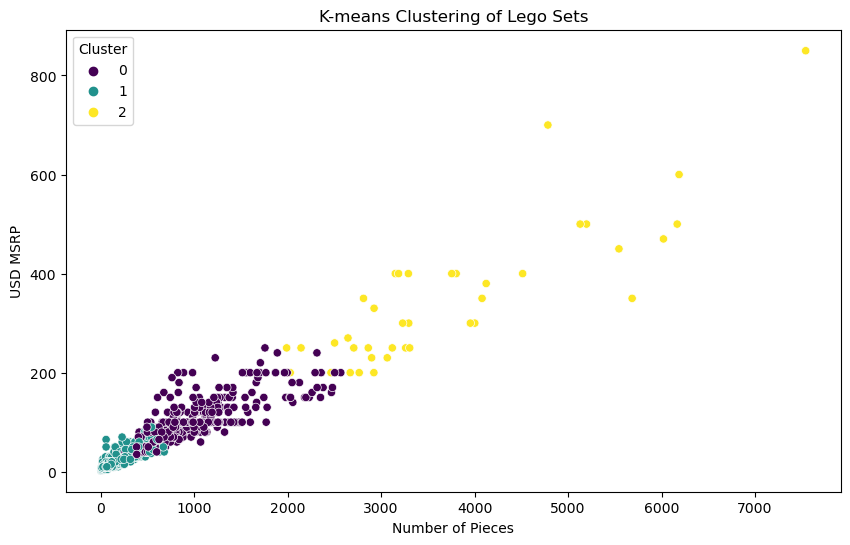

In [49]:

#better for unsuperised 
#choose predictor varibles for clustering
pred_feat = ['Pieces', 'Minifigures', 'Rating', 'USD_MSRP']

# Preprocessing: Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[pred_feat])

# Creating the K-means model
kmeans = KMeans(n_clusters=3, random_state=42)  # Assume we want to cluster into 3 groupscluster_labels = kmeans.fit_predict(scaled_features)
cluster_labels = kmeans.fit_predict(scaled_features)
# Adding cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pieces', y='USD_MSRP', hue='Cluster', data=df, palette='viridis', legend='full')
plt.title('K-means Clustering of Lego Sets')
plt.xlabel('Number of Pieces')
plt.ylabel('USD MSRP')
plt.show()

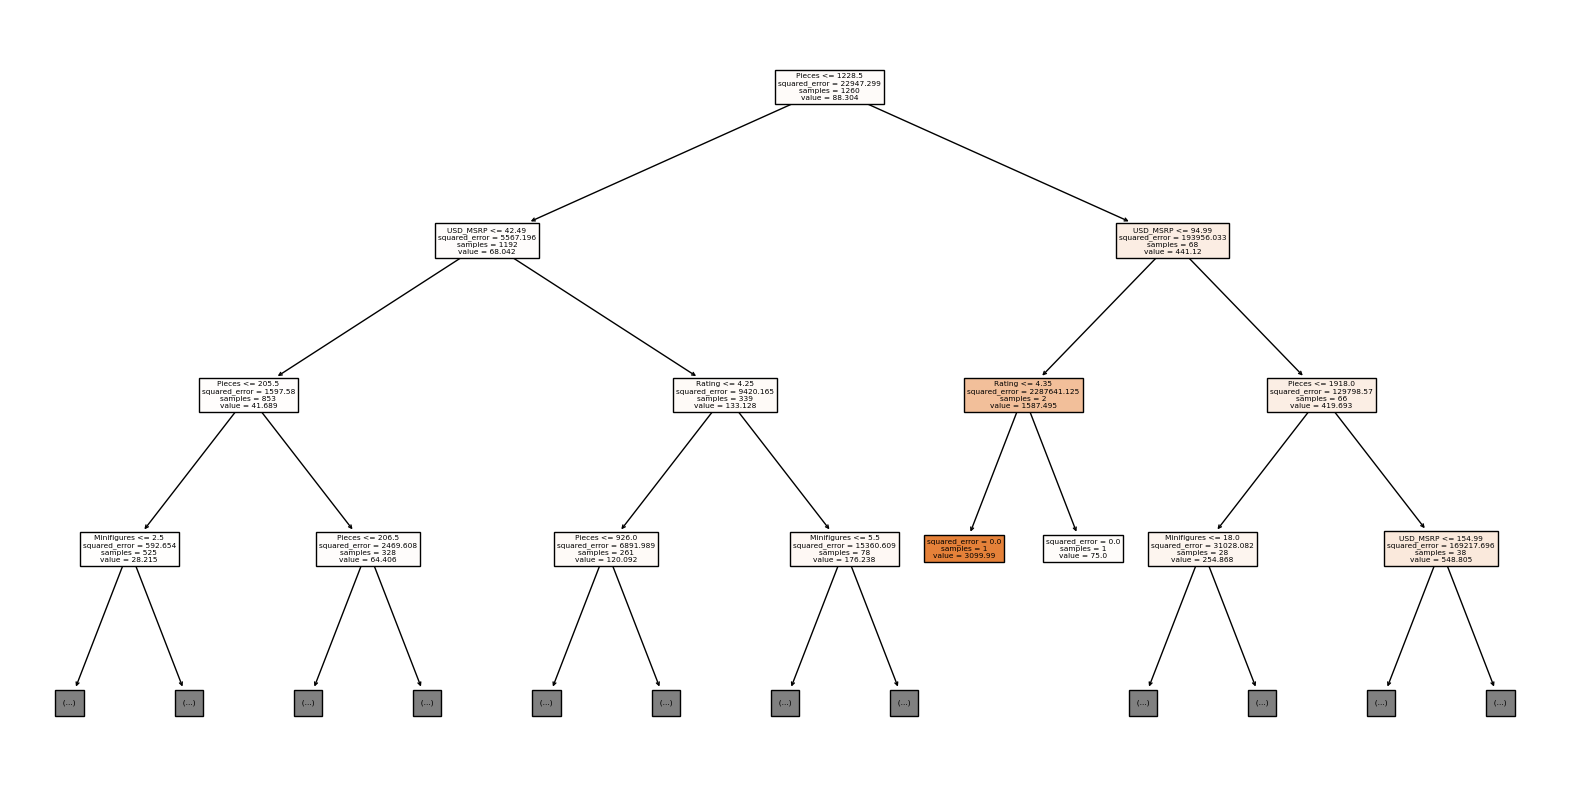

In [44]:
from sklearn.tree import plot_tree

# Convert the Index object to a list of feature names
feature_names_list = X_train.columns.tolist()

# Visualize a single tree from the Random Forest (e.g., the first tree)
plt.figure(figsize=(20, 10))
plot_tree(model2.estimators_[0], feature_names=feature_names_list, filled=True, max_depth=3)
plt.show()

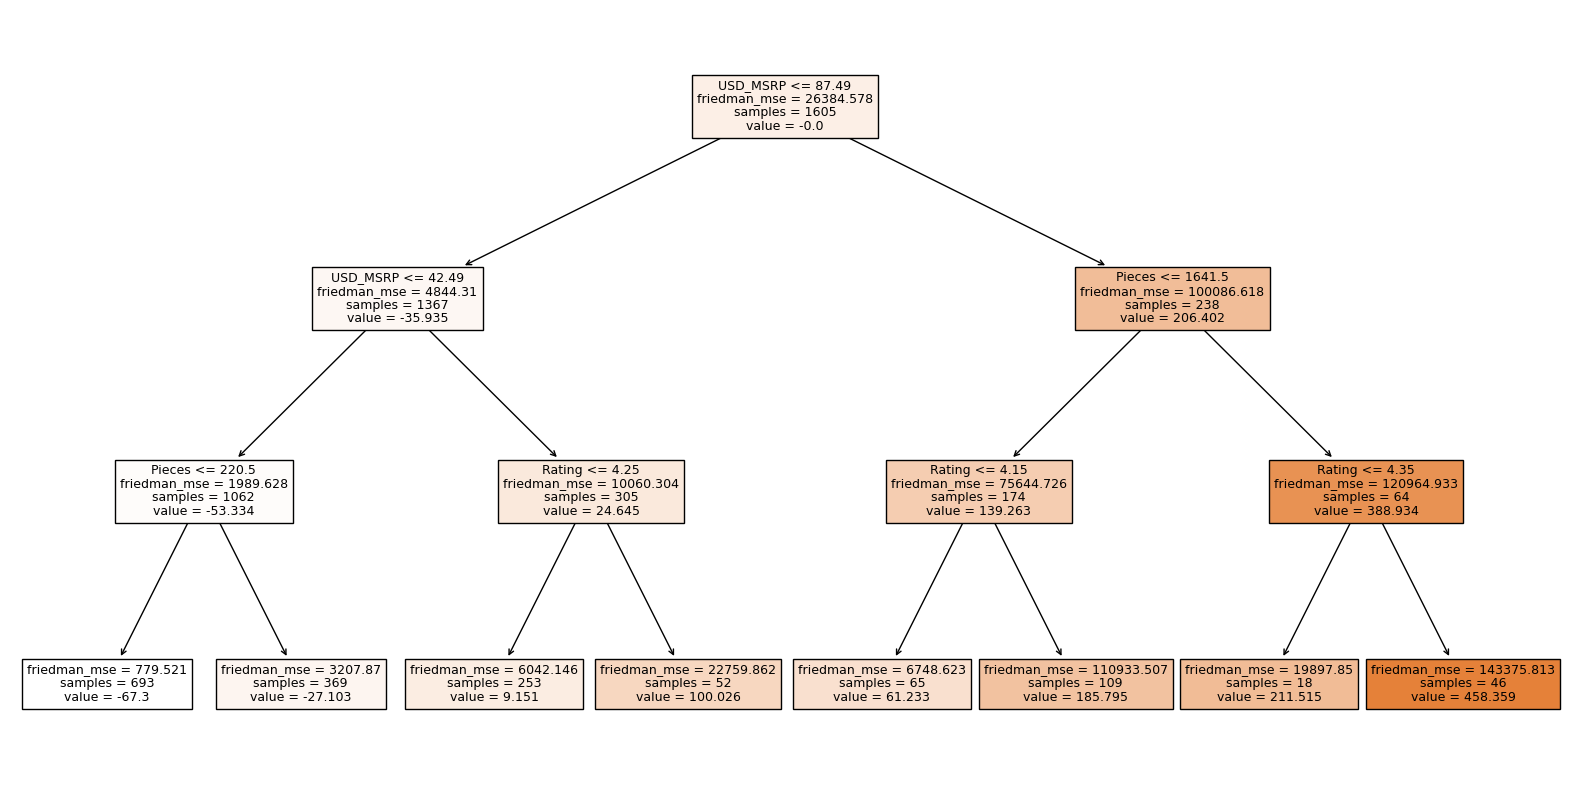

In [45]:
tree_index = 0  # Index of the tree within the ensemble (e.g., 0 for the first tree)
max_depth = 3   # Maximum depth of the tree

# Convert the Index object to a list of feature names
feature_names = X.columns.tolist()

plt.figure(figsize=(20, 10))
plot_tree(model4.estimators_[tree_index, 0], 
          feature_names=feature_names,  # Use the list of feature names
          filled=True, 
          max_depth=max_depth)  # Limit the depth of the tree
plt.show()

#